In [ ]:
import gzip
import pandas as pd

# Reading tsv.gz files using common functions
def read_tsv_gz(file_path):
    with gzip.open(file_path, 'rt') as f:  #'rt' mode reads text from compressed file
        df= pd.read_csv(f, sep='\t', header=None)  #tab-separated values
    return df

In [ ]:
pd.set_option('display.max_rows', None)  # None means no limit
pd.set_option('display.max_columns', None)

# Prevent truncation of cell content
pd.set_option('display.max_colwidth', None)

### Preprocessing the Data

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt


In [2]:
import gzip
from scipy.io import mmread
import pandas as pd

# Function to read .mtx.gz file 
def read_mtx_gz(file_path):
    with gzip.open(file_path, 'rb') as f:  # 'rb' mode reads binary from compressed file
        matrix = mmread(f)  # this is a sparse matrix

    #sparse matrix to a data frame
    df = pd.DataFrame(matrix.toarray())  
    df= df.T #cells x genes format 
    return df

In [3]:
file_path1 = 'GSE75688_final_sample_information.txt.gz'
metadata = pd.read_csv(file_path1, sep='\t')

In [4]:
sc.settings.verbosity = 3

In [5]:
metadata

,sample,type,index,index2,index3
0,BC01_02,SC,Tumor,Tumor,Tumor
1,BC01_03,SC,Tumor,Tumor,Tumor
2,BC01_04,SC,Tumor,Tumor,Tumor
3,BC01_05,SC,Tumor,Tumor,Tumor
4,BC01_06,SC,Tumor,Tumor,Tumor
...,...,...,...,...,...
523,BC06_58,SC,nonTumor,Immune,Bcell
524,BC06_60,SC,Tumor,Tumor,Tumor
525,BC06_61,SC,nonTumor,Immune,Bcell
526,BC06_74,SC,Tumor,Tumor,Tumor


In [7]:
matrix= pd.read_csv("GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt.gz", sep="\t")

In [8]:
matrix

,gene_id,gene_name,gene_type,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,ENSG00000000003.10,TSPAN6,protein_coding,2.33,1.25,43.96,7.64,9.32,133.37,84.77,...,0.00,47.44,16.11,0.00,6.56,0.00,0.00,0.00,200.82,0.00
1,ENSG00000000005.5,TNMD,protein_coding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ENSG00000000419.8,DPM1,protein_coding,60.70,28.44,74.73,41.41,87.69,120.41,70.67,...,198.96,0.00,0.00,20.63,0.00,0.00,0.00,136.07,22.03,204.58
3,ENSG00000000457.9,SCYL3,protein_coding,47.93,4.43,9.89,7.61,7.32,12.42,12.02,...,0.00,10.96,0.00,0.00,0.00,0.27,0.00,0.07,0.19,9.52
4,ENSG00000000460.12,C1orf112,protein_coding,4.79,1.67,10.87,0.92,15.13,17.10,5.69,...,0.00,6.97,9.02,0.00,0.00,0.14,247.69,22.60,11.35,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57910,ERCC-00170,ERCC-00170,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57911,ERCC-00171,ERCC-00171,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57912,SPIKE1,EC2,SPIKE_IN,14940.70,45728.19,10442.91,94250.71,40823.13,24540.58,12613.85,...,166346.51,54443.35,120842.89,135291.06,138048.60,58840.26,65246.34,33465.11,108901.35,57492.01
57913,SPIKE2,EC15,SPIKE_IN,985.82,607.50,362.55,2949.35,1291.13,854.53,399.57,...,6860.84,2136.69,4048.09,4062.59,4147.05,2286.91,2821.49,1652.19,3439.53,1837.41


In [9]:
matrix.columns.unique()

Index(['gene_id', 'gene_name', 'gene_type', 'BC01_Pooled', 'BC01_Tumor',
       'BC02_Pooled', 'BC03_Pooled', 'BC03LN_Pooled', 'BC04_Pooled',
       'BC05_Pooled',
       ...
       'BC11_04', 'BC11_07', 'BC11_28', 'BC11_43', 'BC11_56', 'BC11_69',
       'BC11_70', 'BC11_78', 'BC11_81', 'BC11_88'],
      dtype='object', length=566)

In [10]:
gene_metadata = matrix[['gene_id', 'gene_name', 'gene_type']]
expression_data = matrix.drop(columns=['gene_id', 'gene_name', 'gene_type'])
expression_data = expression_data.T

In [11]:
expression_data

,0,1,2,3,4,5,6,7,8,9,...,57905,57906,57907,57908,57909,57910,57911,57912,57913,57914
BC01_Pooled,2.33,0.0,60.70,47.93,4.79,0.00,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14940.70,985.82,0.0
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.00,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.50,0.0
BC02_Pooled,43.96,0.0,74.73,9.89,10.87,0.52,0.00,46.30,8.72,19.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10442.91,362.55,0.0
BC03_Pooled,7.64,0.0,41.41,7.61,0.92,0.00,0.00,8.57,5.51,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94250.71,2949.35,0.0
BC03LN_Pooled,9.32,0.0,87.69,7.32,15.13,1.39,0.00,5.72,10.00,27.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40823.13,1291.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.00,0.0,0.00,0.27,0.14,0.00,0.00,7.06,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0
BC11_70,0.00,0.0,0.00,0.00,247.69,0.00,0.81,4.49,0.00,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0
BC11_78,0.00,0.0,136.07,0.07,22.60,0.00,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0
BC11_81,200.82,0.0,22.03,0.19,11.35,0.00,0.00,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0


In [12]:
expression_data.columns=matrix['gene_name'].to_numpy()

In [13]:
expression_data

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,EC2,EC15,EC18
BC01_Pooled,2.33,0.0,60.70,47.93,4.79,0.00,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14940.70,985.82,0.0
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.00,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.50,0.0
BC02_Pooled,43.96,0.0,74.73,9.89,10.87,0.52,0.00,46.30,8.72,19.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10442.91,362.55,0.0
BC03_Pooled,7.64,0.0,41.41,7.61,0.92,0.00,0.00,8.57,5.51,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94250.71,2949.35,0.0
BC03LN_Pooled,9.32,0.0,87.69,7.32,15.13,1.39,0.00,5.72,10.00,27.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40823.13,1291.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.00,0.0,0.00,0.27,0.14,0.00,0.00,7.06,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0
BC11_70,0.00,0.0,0.00,0.00,247.69,0.00,0.81,4.49,0.00,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0
BC11_78,0.00,0.0,136.07,0.07,22.60,0.00,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0
BC11_81,200.82,0.0,22.03,0.19,11.35,0.00,0.00,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0


In [14]:
expression_data.index.name = 'cell_names'

In [15]:
expression_data.columns.name='gene_names'

In [16]:
expression_data

gene_names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,EC2,EC15,EC18
cell_names,,,,,,,,,,,,,,,,,,,,,
BC01_Pooled,2.33,0.0,60.70,47.93,4.79,0.00,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14940.70,985.82,0.0
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.00,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.50,0.0
BC02_Pooled,43.96,0.0,74.73,9.89,10.87,0.52,0.00,46.30,8.72,19.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10442.91,362.55,0.0
BC03_Pooled,7.64,0.0,41.41,7.61,0.92,0.00,0.00,8.57,5.51,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94250.71,2949.35,0.0
BC03LN_Pooled,9.32,0.0,87.69,7.32,15.13,1.39,0.00,5.72,10.00,27.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40823.13,1291.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.00,0.0,0.00,0.27,0.14,0.00,0.00,7.06,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0
BC11_70,0.00,0.0,0.00,0.00,247.69,0.00,0.81,4.49,0.00,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0
BC11_78,0.00,0.0,136.07,0.07,22.60,0.00,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0


In [43]:
adata = sc.AnnData(expression_data)

C:\Users\Neermita Bhattachary\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [44]:
adata.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 563 × 57915>

In [45]:
adata.var['gene_ids']= gene_metadata['gene_id'].values
adata.var['gene_type'] = gene_metadata['gene_type'].values

In [46]:
adata

AnnData object with n_obs × n_vars = 563 × 57915
    var: 'gene_ids', 'gene_type'

In [47]:
adata.var

,gene_ids,gene_type
gene_names,,
TSPAN6,ENSG00000000003.10,protein_coding
TNMD,ENSG00000000005.5,protein_coding
DPM1,ENSG00000000419.8,protein_coding
SCYL3,ENSG00000000457.9,protein_coding
C1orf112,ENSG00000000460.12,protein_coding
...,...,...
ERCC-00170,ERCC-00170,ERCC
ERCC-00171,ERCC-00171,ERCC
EC2,SPIKE1,SPIKE_IN


In [48]:
adata.obs

""
cell_names
BC01_Pooled
BC01_Tumor
BC02_Pooled
BC03_Pooled
BC03LN_Pooled
...
BC11_69
BC11_70
BC11_78


In [49]:
print(list(adata.obs_names))

['BC01_Pooled', 'BC01_Tumor', 'BC02_Pooled', 'BC03_Pooled', 'BC03LN_Pooled', 'BC04_Pooled', 'BC05_Pooled', 'BC06_Pooled', 'BC07_Tumor', 'BC07LN_Pooled', 'BC08_Pooled', 'BC09_Pooled', 'BC10_Pooled', 'BC11_Pooled', 'BC01_02', 'BC01_03', 'BC01_04', 'BC01_05', 'BC01_06', 'BC01_08', 'BC01_10', 'BC01_11', 'BC01_12', 'BC01_24', 'BC01_33', 'BC01_34', 'BC01_49', 'BC01_50', 'BC01_53', 'BC01_54', 'BC01_55', 'BC01_57', 'BC01_66', 'BC01_69', 'BC01_70', 'BC01_72', 'BC01_74', 'BC01_77', 'BC01_87', 'BC01_95', 'BC02_02', 'BC02_08', 'BC02_09', 'BC02_10', 'BC02_11', 'BC02_12', 'BC02_13', 'BC02_14', 'BC02_15', 'BC02_18', 'BC02_19', 'BC02_22', 'BC02_24', 'BC02_25', 'BC02_26', 'BC02_27', 'BC02_28', 'BC02_31', 'BC02_33', 'BC02_34', 'BC02_44', 'BC02_47', 'BC02_50', 'BC02_51', 'BC02_53', 'BC02_54', 'BC02_55', 'BC02_58', 'BC02_59', 'BC02_60', 'BC02_61', 'BC02_62', 'BC02_63', 'BC02_64', 'BC02_66', 'BC02_67', 'BC02_68', 'BC02_70', 'BC02_71', 'BC02_73', 'BC02_74', 'BC02_75', 'BC02_76', 'BC02_79', 'BC02_80', 'BC02_

In [50]:
adata.obs_names

Index(['BC01_Pooled', 'BC01_Tumor', 'BC02_Pooled', 'BC03_Pooled',
       'BC03LN_Pooled', 'BC04_Pooled', 'BC05_Pooled', 'BC06_Pooled',
       'BC07_Tumor', 'BC07LN_Pooled',
       ...
       'BC11_04', 'BC11_07', 'BC11_28', 'BC11_43', 'BC11_56', 'BC11_69',
       'BC11_70', 'BC11_78', 'BC11_81', 'BC11_88'],
      dtype='object', name='cell_names', length=563)

In [51]:
metadata['sample']

0          BC01_02
1          BC01_03
2          BC01_04
3          BC01_05
4          BC01_06
          ...     
523        BC06_58
524        BC06_60
525        BC06_61
526        BC06_74
527    BC06_Pooled
Name: sample, Length: 528, dtype: object

In [52]:
metadata

,sample,type,index,index2,index3
0,BC01_02,SC,Tumor,Tumor,Tumor
1,BC01_03,SC,Tumor,Tumor,Tumor
2,BC01_04,SC,Tumor,Tumor,Tumor
3,BC01_05,SC,Tumor,Tumor,Tumor
4,BC01_06,SC,Tumor,Tumor,Tumor
...,...,...,...,...,...
523,BC06_58,SC,nonTumor,Immune,Bcell
524,BC06_60,SC,Tumor,Tumor,Tumor
525,BC06_61,SC,nonTumor,Immune,Bcell
526,BC06_74,SC,Tumor,Tumor,Tumor


In [35]:
adata.obs['key_0']

cell_names
BC01_Pooled        BC01_Pooled
BC01_Tumor          BC01_Tumor
BC02_Pooled        BC02_Pooled
BC03_Pooled        BC03_Pooled
BC03LN_Pooled    BC03LN_Pooled
                     ...      
BC11_69                BC11_69
BC11_70                BC11_70
BC11_78                BC11_78
BC11_81                BC11_81
BC11_88                BC11_88
Name: key_0, Length: 563, dtype: object

In [53]:
adata.obs = adata.obs.join(metadata.set_index('sample'), on=adata.obs.index, how='left')

In [54]:
adata.obs

,key_0,type,index,index2,index3
cell_names,,,,,
BC01_Pooled,BC01_Pooled,Bulk,Tumor,Tumor,Tumor
BC01_Tumor,BC01_Tumor,NaN,NaN,NaN,NaN
BC02_Pooled,BC02_Pooled,Bulk,Tumor,Tumor,Tumor
BC03_Pooled,BC03_Pooled,Bulk,Tumor,Tumor,Tumor
BC03LN_Pooled,BC03LN_Pooled,Bulk,Tumor,Tumor,Tumor
...,...,...,...,...,...
BC11_69,BC11_69,SC,Tumor,Tumor,Tumor
BC11_70,BC11_70,SC,Tumor,Tumor,Tumor
BC11_78,BC11_78,SC,Tumor,Tumor,Tumor


In [55]:
adata.obs['index2'].unique()

array(['Tumor', nan, 'Immune', 'Stromal'], dtype=object)

In [56]:
adata.obs['index3'].unique()

array(['Tumor', nan, 'Immune', 'Stromal', 'Tcell', 'Bcell', 'Myeloid'],
      dtype=object)

In [57]:
adata.obs['index'].unique()

array(['Tumor', nan, 'nonTumor'], dtype=object)

In [58]:
adata.obs=adata.obs.drop(columns=['index2'])

In [59]:
adata.obs.rename(columns={'index3': 'Type of Cell'}, inplace=True)

In [61]:
adata.obs.rename(columns={'index': 'Tumor/Non-Tumor'}, inplace=True)

In [63]:
adata.obs=adata.obs.drop(columns=['key_0'])

In [64]:
adata.obs['type'].value_counts()

type
SC      515
Bulk     12
Name: count, dtype: int64

In [65]:
adata.obs['Tumor/Non-Tumor'].value_counts()

Tumor/Non-Tumor
Tumor       326
nonTumor    201
Name: count, dtype: int64

In [66]:
adata.obs['Type of Cell'].value_counts()

Type of Cell
Tumor      326
Bcell       83
Tcell       54
Myeloid     38
Stromal     23
Immune       3
Name: count, dtype: int64

### Quality Control

In [67]:
adata.var["mt"] = adata.var_names.str.startswith("MT")

normalizing counts per cell
    finished (0:00:00)


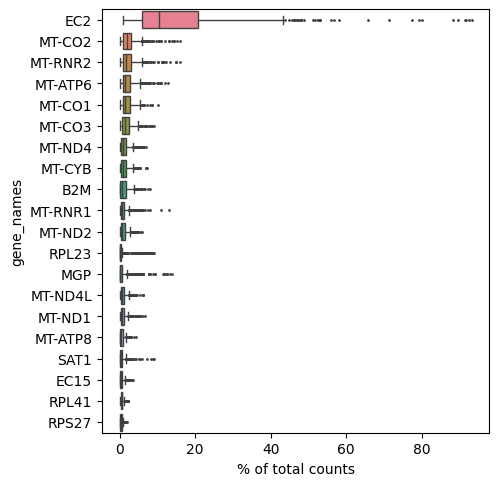

In [68]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [69]:
adata_n= adata.copy()
sc.pp.calculate_qc_metrics(adata_n, qc_vars=["mt"],percent_top=None, log1p=False, inplace=True)

C:\Users\Neermita Bhattachary\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [70]:
adata_n.var

,gene_ids,gene_type,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
gene_names,,,,,,,
TSPAN6,ENSG00000000003.10,protein_coding,False,261,27.691083,53.641208,15590.08
TNMD,ENSG00000000005.5,protein_coding,False,1,0.002238,99.822380,1.26
DPM1,ENSG00000000419.8,protein_coding,False,392,62.991083,30.373002,35463.98
SCYL3,ENSG00000000457.9,protein_coding,False,240,10.700551,57.371226,6024.41
C1orf112,ENSG00000000460.12,protein_coding,False,163,8.548028,71.047957,4812.54
...,...,...,...,...,...,...,...
ERCC-00170,ERCC-00170,ERCC,False,0,0.000000,100.000000,0.00
ERCC-00171,ERCC-00171,ERCC,False,0,0.000000,100.000000,0.00
EC2,SPIKE1,SPIKE_IN,False,563,161189.558242,0.000000,90749721.29


In [72]:
adata_n.obs

,type,Tumor/Non-Tumor,Type of Cell,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
cell_names,,,,,,,
BC01_Pooled,Bulk,Tumor,Tumor,16264,1000000.18,259879.88,25.987983
BC01_Tumor,NaN,NaN,NaN,17569,999999.47,402457.36,40.245757
BC02_Pooled,Bulk,Tumor,Tumor,17874,999999.94,148938.29,14.893830
BC03_Pooled,Bulk,Tumor,Tumor,11852,1000000.36,444370.13,44.436997
BC03LN_Pooled,Bulk,Tumor,Tumor,14435,999999.62,80553.30,8.055333
...,...,...,...,...,...,...,...
BC11_69,SC,Tumor,Tumor,5452,1000000.33,269193.01,26.919292
BC11_70,SC,Tumor,Tumor,7104,999999.80,135743.16,13.574319
BC11_78,SC,Tumor,Tumor,7427,999999.64,255101.57,25.510166


In [73]:
adata_n

AnnData object with n_obs × n_vars = 563 × 57915
    obs: 'type', 'Tumor/Non-Tumor', 'Type of Cell', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'gene_type', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [76]:
adata_n.var_names_make_unique()

C:\Users\Neermita Bhattachary\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\utils.py:261: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD113-1', 'SNORD113-2', 'SNORD113-3', 'SNORD113-4', 'SNORD113-5']
  warnings.warn(


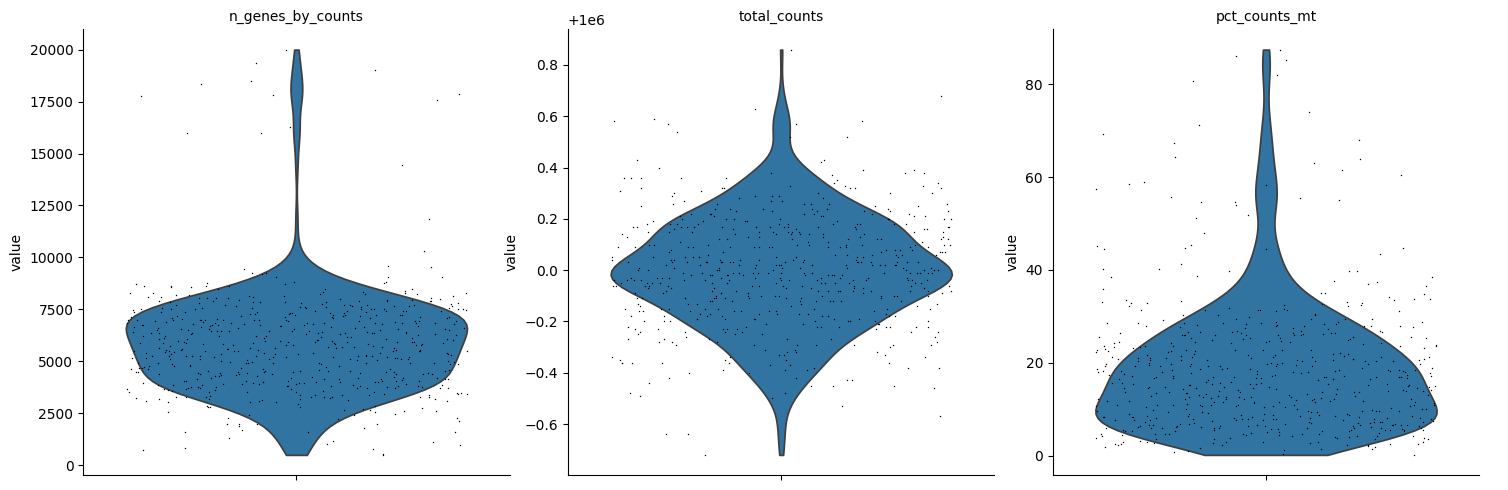

In [77]:
sc.pl.violin(adata_n, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

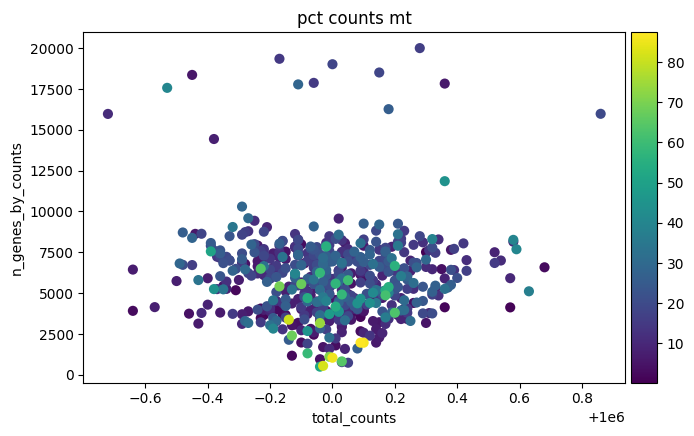

In [78]:
sc.pl.scatter(adata_n, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

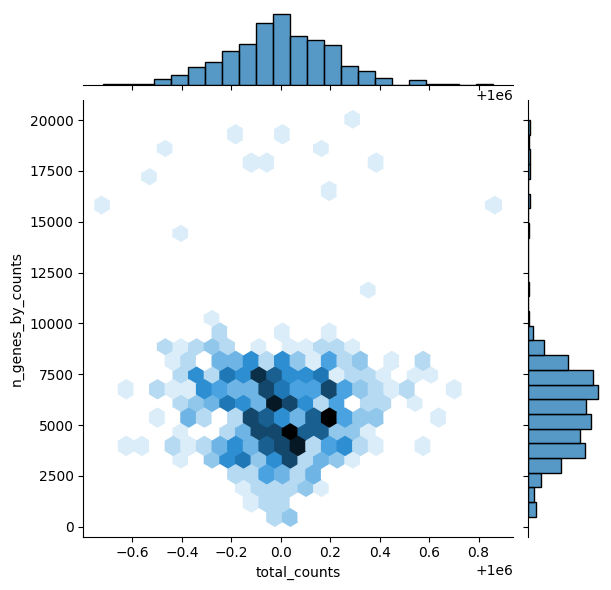

In [79]:
import seaborn as sns
sns.jointplot(
    data=adata_n.obs,
    x="total_counts",
    y="n_genes_by_counts",
    kind="hex",
)

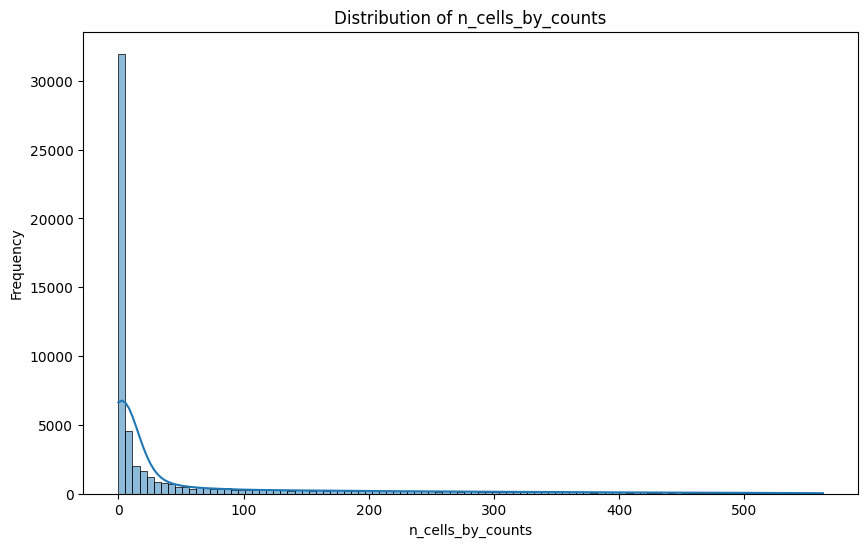

In [80]:
n_cells_by_counts = adata_n.var['n_cells_by_counts']
plt.figure(figsize=(10, 6))
sns.histplot(n_cells_by_counts, bins=100, kde=True)
plt.title('Distribution of n_cells_by_counts')
plt.xlabel('n_cells_by_counts')
plt.ylabel('Frequency')
plt.show()

In [81]:
pd.DataFrame(adata_n.var.n_cells_by_counts<50).value_counts()

n_cells_by_counts
True                 43988
False                13927
Name: count, dtype: int64

14000 genes expressed in less than 50 cells

In [82]:
sc.pp.filter_cells(adata_n, min_genes=100)

In [83]:
sc.pp.filter_genes(adata_n, min_cells=3)

filtered out 26873 genes that are detected in less than 3 cells


remove doublets

In [84]:
adata_n = adata_n[adata_n.obs.n_genes_by_counts < 18000, :]

remove cells with high MT content

In [85]:
adata_n = adata_n[adata_n.obs.pct_counts_mt < 30, :]

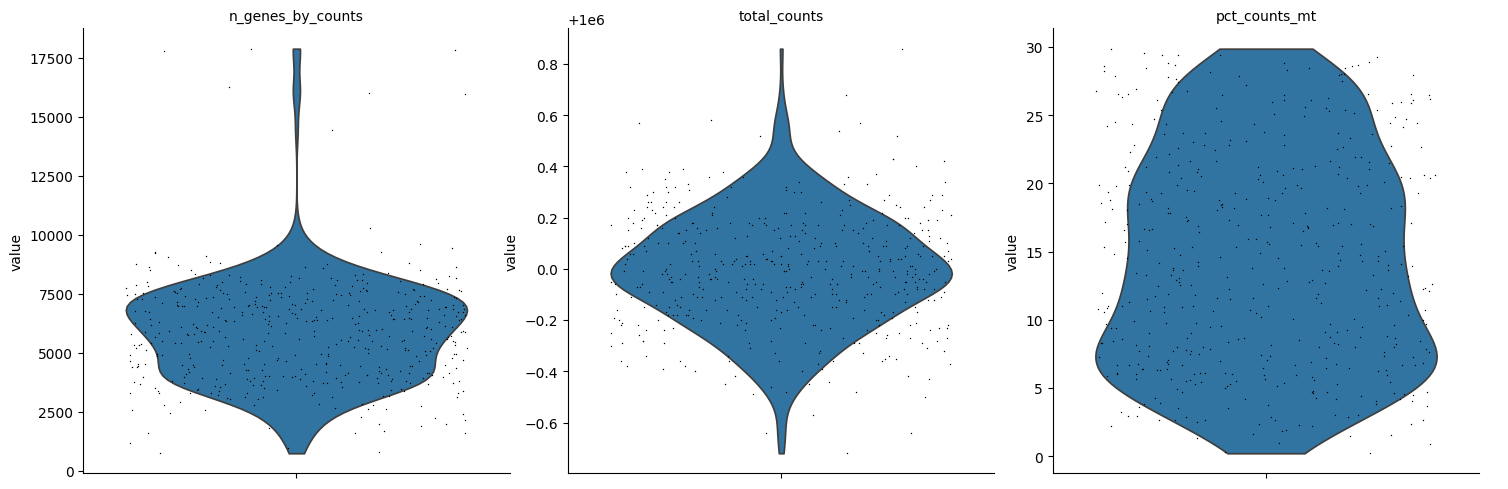

In [86]:
sc.pl.violin(adata_n, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

In [87]:
adata_n

View of AnnData object with n_obs × n_vars = 477 × 31042
    obs: 'type', 'Tumor/Non-Tumor', 'Type of Cell', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'gene_type', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

### Normalization

In [88]:
normal_adata = adata_n.copy()

In [89]:
sc.pp.normalize_total(normal_adata)
sc.pp.log1p(normal_adata)

normalizing counts per cell
    finished (0:00:00)


### Highly Variable Genes

In [90]:
hvg_adata = normal_adata.copy()

In [91]:
sc.pp.highly_variable_genes(hvg_adata, n_top_genes=2000)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


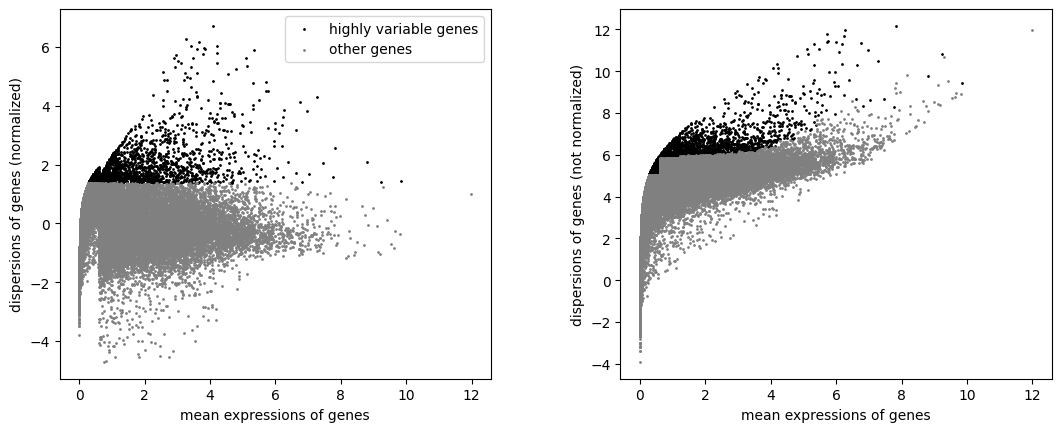

In [92]:
sc.pl.highly_variable_genes(hvg_adata)

### PCA

In [93]:
pca_adata = hvg_adata.copy()

In [98]:
sc.tl.pca(pca_adata, n_comps=60)

computing PCA
    with n_comps=60
    finished (0:00:11)


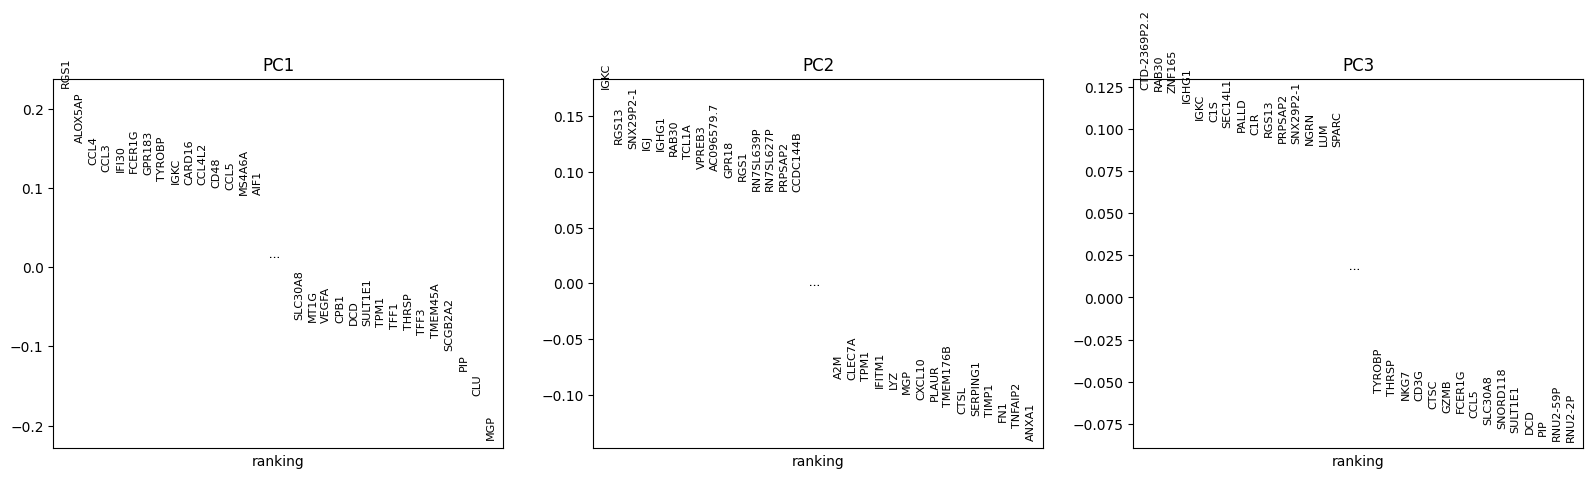

In [99]:
sc.pl.pca_loadings(pca_adata)

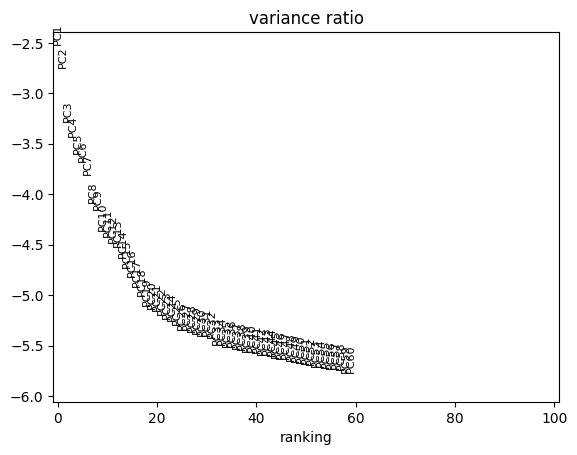

In [100]:
sc.pl.pca_variance_ratio(pca_adata, n_pcs=100, log=True)

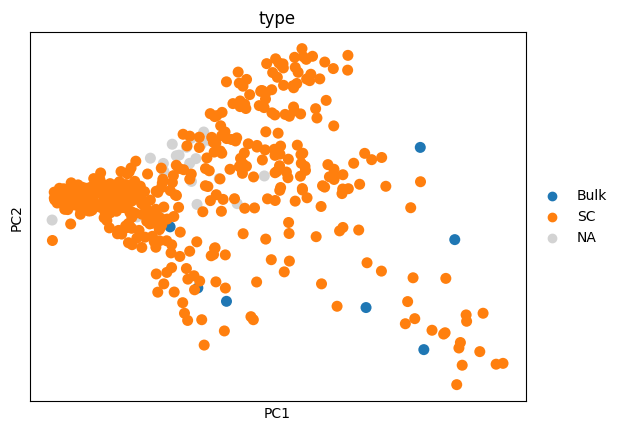

In [102]:
sc.pl.pca(pca_adata, color="type")

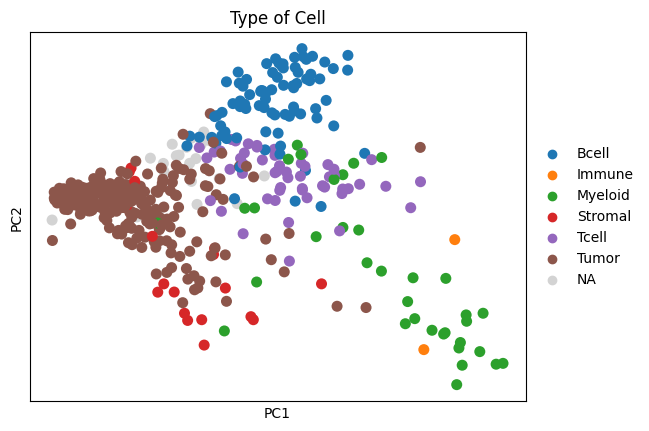

In [104]:
sc.pl.pca(pca_adata, color="Type of Cell")

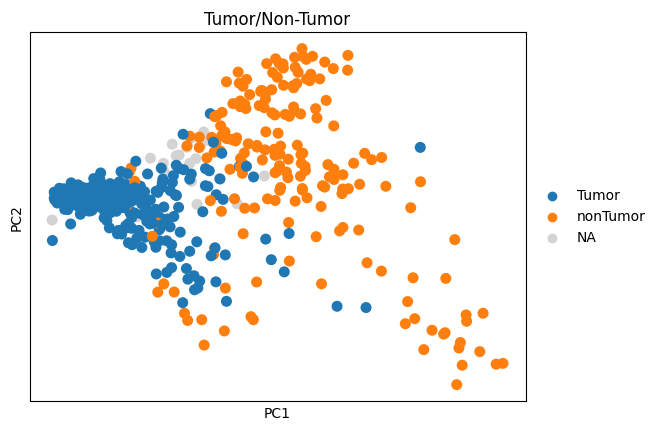

In [105]:
sc.pl.pca(pca_adata, color="Tumor/Non-Tumor")

### UMAP

In [106]:
sc.pp.neighbors(pca_adata)

computing neighbors
    using 'X_pca' with n_pcs = 60
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)


In [107]:
sc.tl.umap(pca_adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)


### Clusters

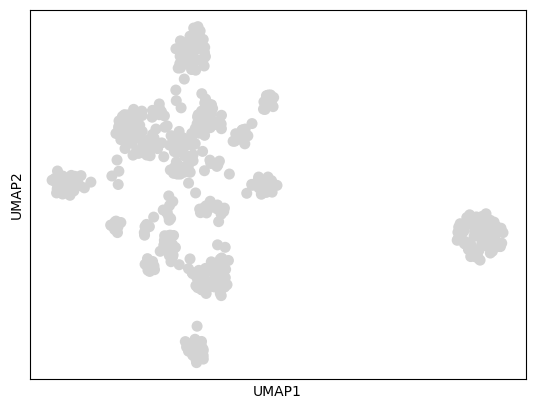

In [109]:
sc.pl.umap(pca_adata)

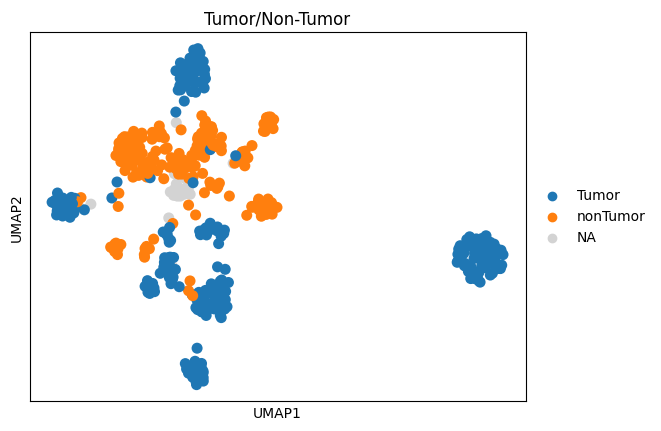

In [108]:
sc.pl.umap(pca_adata, color="Tumor/Non-Tumor")

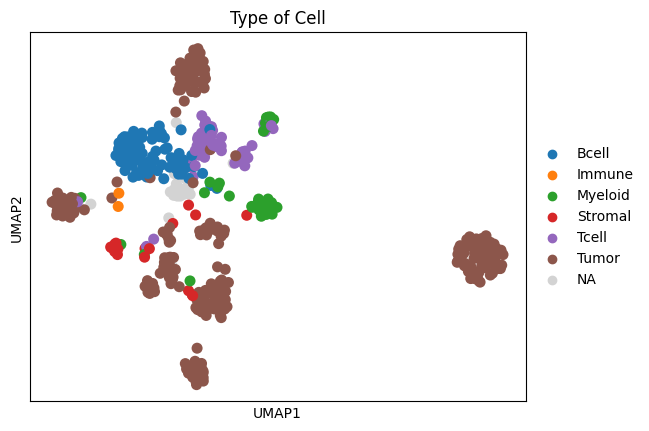

In [110]:
sc.pl.umap(pca_adata, color="Type of Cell")

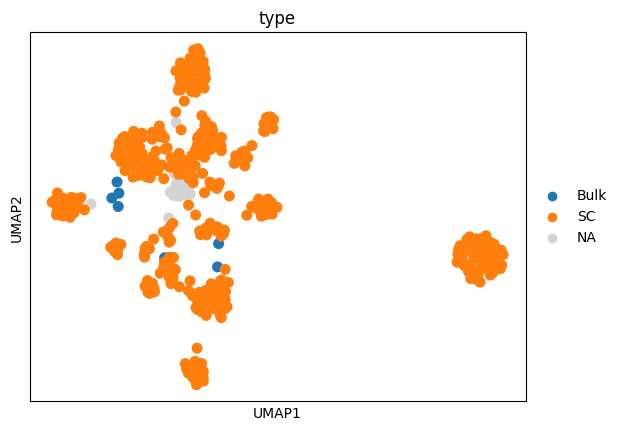

In [111]:
sc.pl.umap(pca_adata, color="type")

In [ ]:
sc.pl.umap(pca_adata, color="gene_type")